In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\serum_processed.csv')
plasma = plasma.drop(['Unnamed: 0'], axis=1)
serum = serum.drop(['Unnamed: 0'], axis=1)
plasma

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9483,103,101,963,389,123,20744,139,36,955,...,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,27468,207,155,335,227,178,8611,78,91,103,...,17898,37179,157,180080,8386,118,103083,324,929,disease
2,13976,86,78,176,152,83,22792,92,97,1010,...,29503,30670,211,138861,15822,119,92045,253,610,disease
3,19449,178,104,467,270,157,29418,123,92,289,...,16501,27573,71,183633,14024,102,97349,223,746,disease
4,17209,258,103,979,314,211,16713,76,42,1126,...,24023,30096,222,255081,23154,58,159671,189,2022,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25149,184,154,444,142,244,20728,51,128,186,...,30518,36411,114,226793,17880,57,114920,252,856,control
78,24181,142,135,786,226,146,10688,64,59,80,...,23731,26506,110,365044,29018,61,127248,359,1003,control
79,23848,118,65,132,352,294,10077,42,56,867,...,30277,35764,158,327943,19736,76,78152,453,1279,control
80,13848,97,65,881,444,122,14869,75,203,1104,...,14930,18921,2176,323303,17479,108,96830,1450,1045,control


In [115]:
plasma.dtypes

1_5-anhydroglucitol                 int64
1-monostearin                       int64
2_3-dihydroxybutanoic acid NIST     int64
2_4-diaminobutyric acid             int64
2-deoxyerythritol                   int64
                                    ...  
uridine                             int64
valine                              int64
xylitol                             int64
xylose                              int64
Class                              object
Length: 159, dtype: object

In [116]:
from scipy import stats

pearson_p = []
for i in plasma.columns:
    if plasma[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(plasma[i], plasma['Class'].map({"control": 0, "disease": 1}))
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Features', 'Pearson Coefficient', 'p-Value'])
# pearson_p_df

In [117]:
pearson_p_final = []
for i in range(158):
    if pearson_p_df.loc[i, 'p-Value'] < 0.01:
        pearson_p_final.append(pearson_p_df.loc[i, 'Features'])
len(pearson_p_final)

22

# Serum

In [118]:
pearson_p_serum = []
for i in serum.columns:
    if serum[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(serum[i], serum['Class'].map({"control": 0, "disease": 1}))
        pearson_p_serum.append([i, pearson_coef, p_value])
pearson_p_df_serum = pd.DataFrame(pearson_p_serum, columns=['Features', 'Pearson Coefficient', 'p-Value'])
# pearson_p_df_serum

In [119]:
pearson_p_final_serum = []
for i in range(158):
    if pearson_p_df_serum.loc[i, 'p-Value'] < 0.01:
        pearson_p_final_serum.append(pearson_p_df_serum.loc[i, 'Features'])
len(pearson_p_final_serum)

10

In [120]:
imp0 = pearson_p_final
imp1 = pearson_p_final_serum

## Merge the datasets with important features of both 1st & 2nd aprroaches

In [121]:
plasma1 = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/plasma(Specific Metabolics)_final.csv')
plasma2 = plasma[imp0]
plasma_mix = pd.concat([plasma1, plasma2], axis=1)
plasma_mix = plasma_mix.loc[:,~plasma_mix.columns.duplicated()].drop(['Unnamed: 0', 'Class'], axis=1)
plasma_mix

,asparagine,benzoic acid,tryptophan,uric acid,alpha-ketoglutarate,citrulline,glutamine,malic acid,methionine sulfoxide,3-phosphoglycerate,...,aspartic acid,lactic acid,maltose,maltotriose,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,N-methylalanine
0,-0.38,-1.31,0.52,-1.02,0.51,-0.33,-0.19,0.76,0.19,-0.49,...,0.02,-0.04,-0.34,-1.21,-0.10,0.03,-0.27,1.38,0.41,9576
1,0.95,-0.46,-0.90,-1.24,-0.39,0.69,1.04,0.09,-0.47,0.92,...,0.40,0.15,-0.29,-0.13,0.22,-0.83,-0.41,0.29,-0.16,5239
2,0.69,-0.49,0.83,-0.23,0.35,-0.56,0.36,0.06,-0.71,0.19,...,0.18,1.06,0.24,0.68,0.98,0.02,0.95,-0.19,0.83,7139
3,0.35,1.68,-1.11,-0.48,-0.75,-0.99,1.15,-0.41,-0.65,0.33,...,-0.35,0.53,-0.19,-0.38,0.69,-0.19,-0.59,-0.66,1.25,17227
4,0.30,-1.20,0.01,0.76,-0.14,0.77,-0.31,0.76,0.12,0.60,...,0.01,-0.33,-0.01,1.43,-0.27,0.32,0.52,-0.09,0.08,13572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.77,-0.63,0.98,0.05,-0.30,0.08,1.06,-0.97,0.33,-0.89,...,-0.82,-0.72,-0.35,-0.38,-0.68,-0.45,-0.96,-0.12,-0.37,12947
78,-0.43,-1.06,-0.03,1.56,-0.64,-0.41,-0.13,-0.67,-0.37,0.36,...,-0.73,0.64,-0.19,-0.60,0.79,-0.42,-0.22,-0.51,-0.23,11974
79,-0.10,1.50,0.94,0.30,0.78,0.91,1.47,1.22,0.38,-0.47,...,-0.52,-0.53,-0.35,0.05,-0.44,-0.24,-0.67,-0.36,-0.54,6210
80,-1.22,0.90,-1.34,-0.01,-0.14,-1.17,-1.39,-0.09,0.38,-0.78,...,-0.67,-0.46,-0.50,-0.83,-0.18,-0.44,-0.92,-0.10,-1.05,12718


In [122]:
serum1 = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/serum(Specific Metabolics)_final.csv')
serum2 = serum[imp1]
serum_mix = pd.concat([serum1, serum2], axis=1)
serum_mix = serum_mix.loc[:,~serum_mix.columns.duplicated()].drop(['Unnamed: 0', 'Class'], axis=1)
serum_mix

,cholesterol,lactic acid,N-methylalanine,phenylalanine,aspartic acid,deoxypentitol,glutamic acid,malic acid,phenol,taurine
0,0.12,0.09,-0.19,-0.34,-0.41,-1.27,-0.21,0.47,-0.12,0.01
1,1.16,0.68,-1.14,0.30,0.18,0.01,-0.48,-0.32,0.45,0.86
2,1.34,1.63,-0.72,-0.86,-0.14,0.57,0.75,-0.13,1.34,0.04
3,1.05,0.26,1.63,-0.05,0.28,-0.04,-0.31,0.06,0.25,0.78
4,-0.76,-0.83,0.86,-0.04,-0.56,-0.62,-0.80,0.13,-1.47,-0.75
...,...,...,...,...,...,...,...,...,...,...
77,0.44,-0.91,0.53,-0.12,-0.61,0.46,0.21,-0.27,-0.76,-1.02
78,-1.02,0.25,0.63,-0.23,0.18,0.20,0.01,0.32,0.09,-0.49
79,-0.20,-0.61,-0.83,0.07,-0.68,-0.24,-0.64,0.11,-0.47,-0.79
80,-0.46,-0.26,1.01,-0.85,-0.42,-0.47,-0.49,-0.50,-1.72,-0.37


In [123]:
# necessary functions
from sklearn.decomposition import PCA
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

# Lzypredict

In [124]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

In [125]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [126]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
    
    if k==0:
        name = ['Plasma(mix)', 'Serum(mix)']
        dfs = [plasma_mix, serum_mix]
    
    elif k==22 or k==23:
        k -= 20
        name = [f'tsne{k}_plasma(mix)', f'tsne{k}_serum(mix)']
        vars()[f'tsne{k}_plasma'] = tsne_analysis(plasma_mix, k)
        vars()[f'tsne{k}_plasma_df'] = make_dataframe(vars()[f'tsne{k}_plasma'], k)
        
        vars()[f'tsne{k}_serum'] = pca_analysis(serum_mix, k)
        vars()[f'tsne{k}_serum_df'] = make_dataframe(vars()[f'tsne{k}_serum'], k)
        
        dfs = [vars()[f'tsne{k}_plasma_df'], vars()[f'tsne{k}_serum_df']]
    
    else:
        if k<=5:
            name = [f'pca{k}_plasma(mix)', f'pca{k}_serum(mix)']
            vars()[f'pca{k}_plasma'] = pca_analysis(plasma_mix, k)
            vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

            vars()[f'pca{k}_serum'] = pca_analysis(serum_mix, k)
            vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)

            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
        else:
            name = [f'pca{k}_plasma(mix)']
            vars()[f'pca{k}_plasma'] = pca_analysis(plasma_mix, k)
            vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

            dfs = [vars()[f'pca{k}_plasma_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(10):
            acc.append(result[i].iloc[0]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  3%|▎         | 1/29 [00:00<00:03,  9.17it/s]


Plasma(mix): 0.8760975135975138


  7%|▋         | 2/29 [00:00<00:01, 19.05it/s]


Serum(mix): 0.8667929292929294


  7%|▋         | 2/29 [00:00<00:01, 18.87it/s]


pca2_plasma(mix): 0.8918123543123544


  7%|▋         | 2/29 [00:00<00:01, 18.69it/s]


pca2_serum(mix): 0.8197115384615383


  3%|▎         | 1/29 [00:00<00:02,  9.43it/s]


pca3_plasma(mix): 0.88486790986791


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca3_serum(mix): 0.8374660062160062


  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


pca4_plasma(mix): 0.8813956876456878


  7%|▋         | 2/29 [00:00<00:01, 18.51it/s]


pca4_serum(mix): 0.8510926573426574


  7%|▋         | 2/29 [00:00<00:01, 17.24it/s]


pca5_plasma(mix): 0.8908022533022534


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca5_serum(mix): 0.8618881118881119


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca10_plasma(mix): 0.8706585081585082


  7%|▋         | 2/29 [00:00<00:01, 16.81it/s]


pca15_plasma(mix): 0.8820901320901322


100%|██████████| 29/29 [00:00<00:00, 46.55it/s]



pca20_plasma(mix): 0.875456487956488


  3%|▎         | 1/29 [00:00<00:03,  8.93it/s]


tsne2_plasma(mix): 0.8640297202797204


100%|██████████| 29/29 [00:00<00:00, 40.67it/s]



tsne2_serum(mix): 0.8197115384615383


  7%|▋         | 2/29 [00:00<00:01, 17.54it/s]


tsne3_plasma(mix): 0.8218628593628594


100%|██████████| 29/29 [00:00<00:00, 44.96it/s]


tsne3_serum(mix): 0.8374660062160062


In [127]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
accuracy_df.to_csv('accuracy_mix.csv', index=False)
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(mix),0.8760975135975138
1,Serum(mix),0.8667929292929294
2,pca2_plasma(mix),0.8918123543123544
3,pca2_serum(mix),0.8197115384615383
4,pca3_plasma(mix),0.88486790986791
5,pca3_serum(mix),0.8374660062160062
6,pca4_plasma(mix),0.8813956876456878
7,pca4_serum(mix),0.8510926573426574
8,pca5_plasma(mix),0.8908022533022534
9,pca5_serum(mix),0.8618881118881119


In [132]:
final_acc = pd.concat([accuracy_df, pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_final.csv')], ignore_index=True)
final_acc.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_final.csv')
final_acc

,Processed Dataset,Accuracy,Unnamed: 0,Unnamed: 0.1
0,Plasma(mix),0.8760975135975138,nan,nan
1,Serum(mix),0.8667929292929294,nan,nan
2,pca2_plasma(mix),0.8918123543123544,nan,nan
3,pca2_serum(mix),0.8197115384615383,nan,nan
4,pca3_plasma(mix),0.88486790986791,nan,nan
5,pca3_serum(mix),0.8374660062160062,nan,nan
6,pca4_plasma(mix),0.8813956876456878,nan,nan
7,pca4_serum(mix),0.8510926573426574,nan,nan
8,pca5_plasma(mix),0.8908022533022534,nan,nan
9,pca5_serum(mix),0.8618881118881119,nan,nan


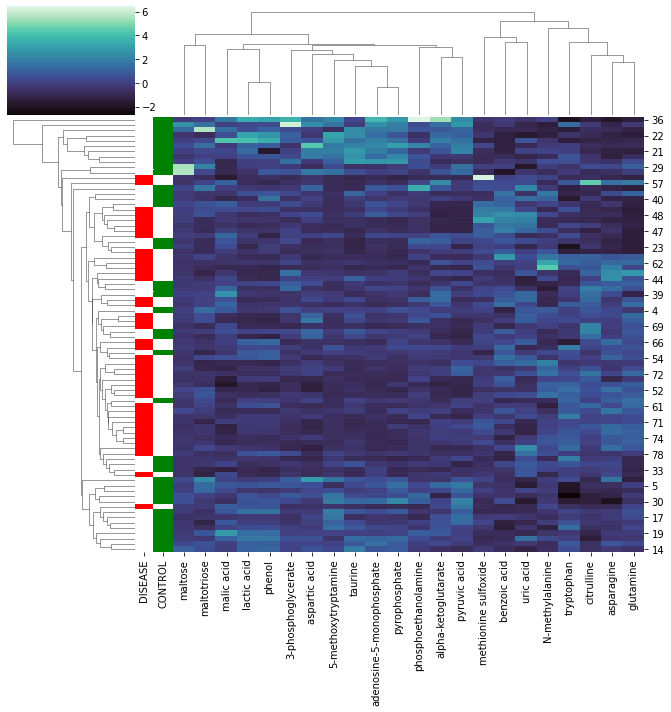

In [133]:
# Data set
import seaborn as sns
final_df1 = plasma.copy()
Class = plasma["Class"].copy()
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(plasma[imp0], cmap='mako', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('plotting/clustermap_exploratory_plasma_mix.JPG')
plt.show()

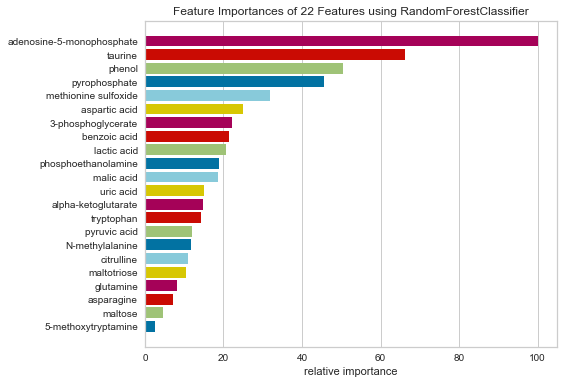

<AxesSubplot:title={'center':'Feature Importances of 22 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [135]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = plasma_mix
y = plasma['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

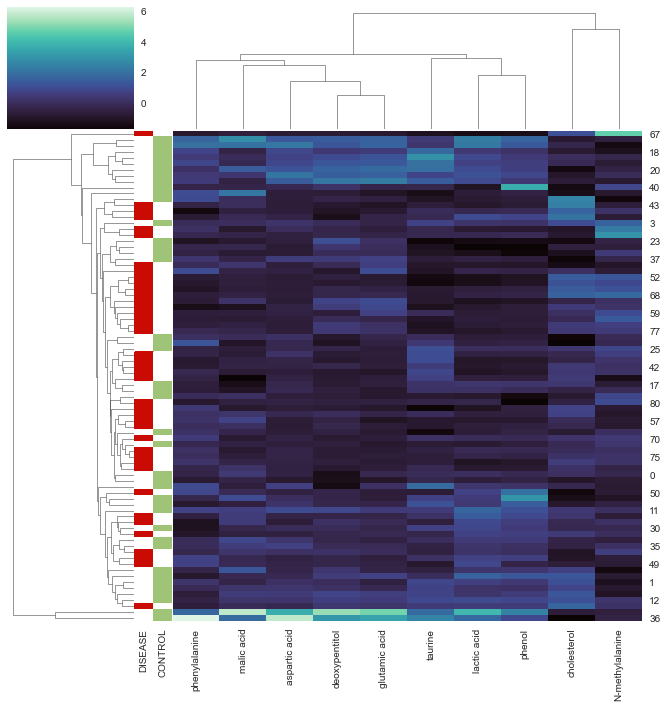

In [136]:
# Data set
import seaborn as sns
final_df1 = serum_mix.copy()
Class = y
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(serum[imp1], cmap='mako', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('plotting/clustermap_exploratory_serum_mix.JPG')
plt.show()

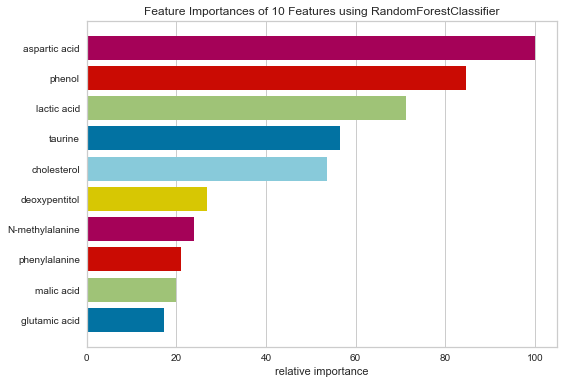

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [138]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = serum_mix
# y = final_df1['Class'].copy()
y = Class
model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()